In [1]:
# In this example, we train a Decision Tree classifier to predict the type of iris flower
# based on two features: petal length and petal width. We restrict the depth of the tree to 2
# to make it simple and interpretable. This is similar to the illustration in Figure 6-1 of the book.

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()

# Select only the petal length and petal width features (2D input for visualization)
X = iris.data[:, 2:]  # columns 2 and 3: petal length and petal width
y = iris.target       # class labels (Setosa, Versicolor, Virginica)

# Create and train a Decision Tree Classifier
# - max_depth=2 limits the tree depth to avoid overfitting and keep the model simple
# - random_state=42 ensures reproducibility
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [2]:
# This snippet generates a .dot file that can be visualized using Graphviz.
# It shows a graphical representation of the decision tree learned from the iris dataset,
# with petal length and petal width as input features.

from sklearn.tree import export_graphviz

# Export the decision tree to a .dot file
# You can convert it to a PNG using the command:
# dot -Tpng iris_tree.dot -o iris_tree.png
with open("D:\hands_on_machine_learning\C6 - Decision Trees\iris_tree.dot", 'w') as f:
    export_graphviz(
        tree_clf,
        out_file=f,                             # Output file path
        feature_names=iris.feature_names[2:],   # Only petal length and width
        class_names=iris.target_names,          # Target class labels
        rounded=True,                           # Round node corners
        filled=True                             # Fill color based on class
    )

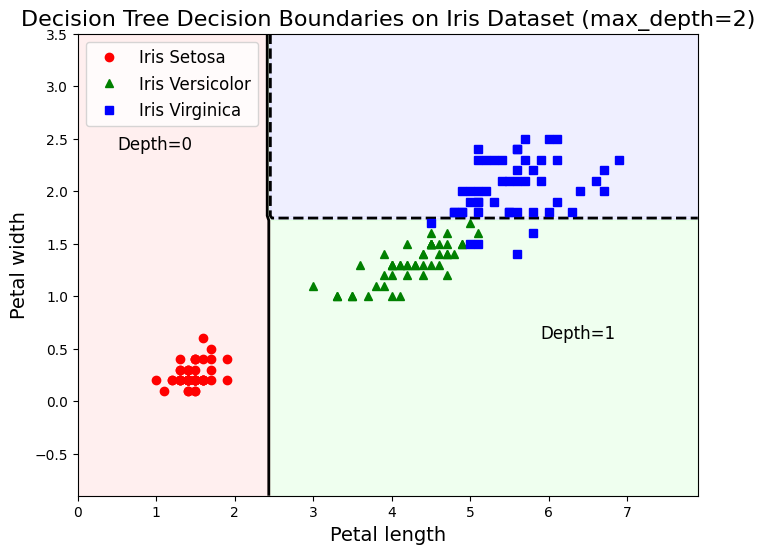

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# function to plot the decision boundaries of a classifier
def plot_decision_boundary(clf, X, y, ax=None):
    if ax is None:
        ax = plt.gca()
    
    # create a mesh grid over the feature space
    x1s = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    x2s = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)  # predict on the grid
    
    # set custom background colors for classes
    custom_cmap = ListedColormap(['#ffcccc', '#ccffcc', '#ccccff'])
    ax.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)  # plot filled contour

    # plot the decision boundary for depth=0 (first split)
    contour_0 = ax.contour(x1, x2, y_pred, levels=[0.5], colors="k", linestyles='-', linewidths=2)
    ax.text(X[:, 0].min() - 0.5, X[:, 1].max() - 0.1, "Depth=0", fontsize=12, color="k")
    
    # plot the decision boundary for depth=1 (second split)
    contour_1 = ax.contour(x1, x2, y_pred, levels=[1.5], colors="k", linestyles='--', linewidths=2)
    ax.text(X[:, 0].max() - 1.0, X[:, 1].min() + 0.5, "Depth=1", fontsize=12, color="k")

# plot the decision boundary and the original dataset
plt.figure(figsize=(8, 6))
plot_decision_boundary(tree_clf, X, y)

# plot each class with different marker shapes and colors
plt.plot(X[y == 0, 0], X[y == 0, 1], "o", label="Iris Setosa", color="red")
plt.plot(X[y == 1, 0], X[y == 1, 1], "^", label="Iris Versicolor", color="green")
plt.plot(X[y == 2, 0], X[y == 2, 1], "s", label="Iris Virginica", color="blue")

# add axis labels, legend and title
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.title("Decision Tree Decision Boundaries on Iris Dataset (max_depth=2)", fontsize=16)

plt.show()